In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [9]:
data = pd.read_csv("dataset.csv")

## **EDA**

In [10]:
data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [11]:
data.describe()

,Unnamed: 0,ID,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.000000,101.000000,101.00000,101.000000,99.000000,100.000000,100.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,91.405941,70.09901,39.698020,385.858586,390.280000,399.110000,1.603762,58.531485,2.954950,...,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,29.300171,51.516246,7.89874,24.558713,104.744199,107.754498,106.550116,0.672763,22.294821,0.976283,...,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,1.000000,1.000000,44.00000,1.000000,120.000000,120.000000,120.000000,0.450000,3.290000,1.140000,...,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,49.000000,65.00000,20.000000,300.000000,303.750000,303.750000,1.100000,42.000000,2.270000,...,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,87.000000,71.00000,36.000000,419.000000,399.000000,420.000000,1.600000,60.000000,2.770000,...,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,143.000000,75.00000,54.000000,460.500000,459.000000,465.250000,1.960000,75.000000,3.630000,...,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,101.000000,169.000000,88.00000,109.000000,688.000000,699.000000,699.000000,3.180000,102.000000,5.370000,...,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.isnull().sum()

Unnamed: 0      0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

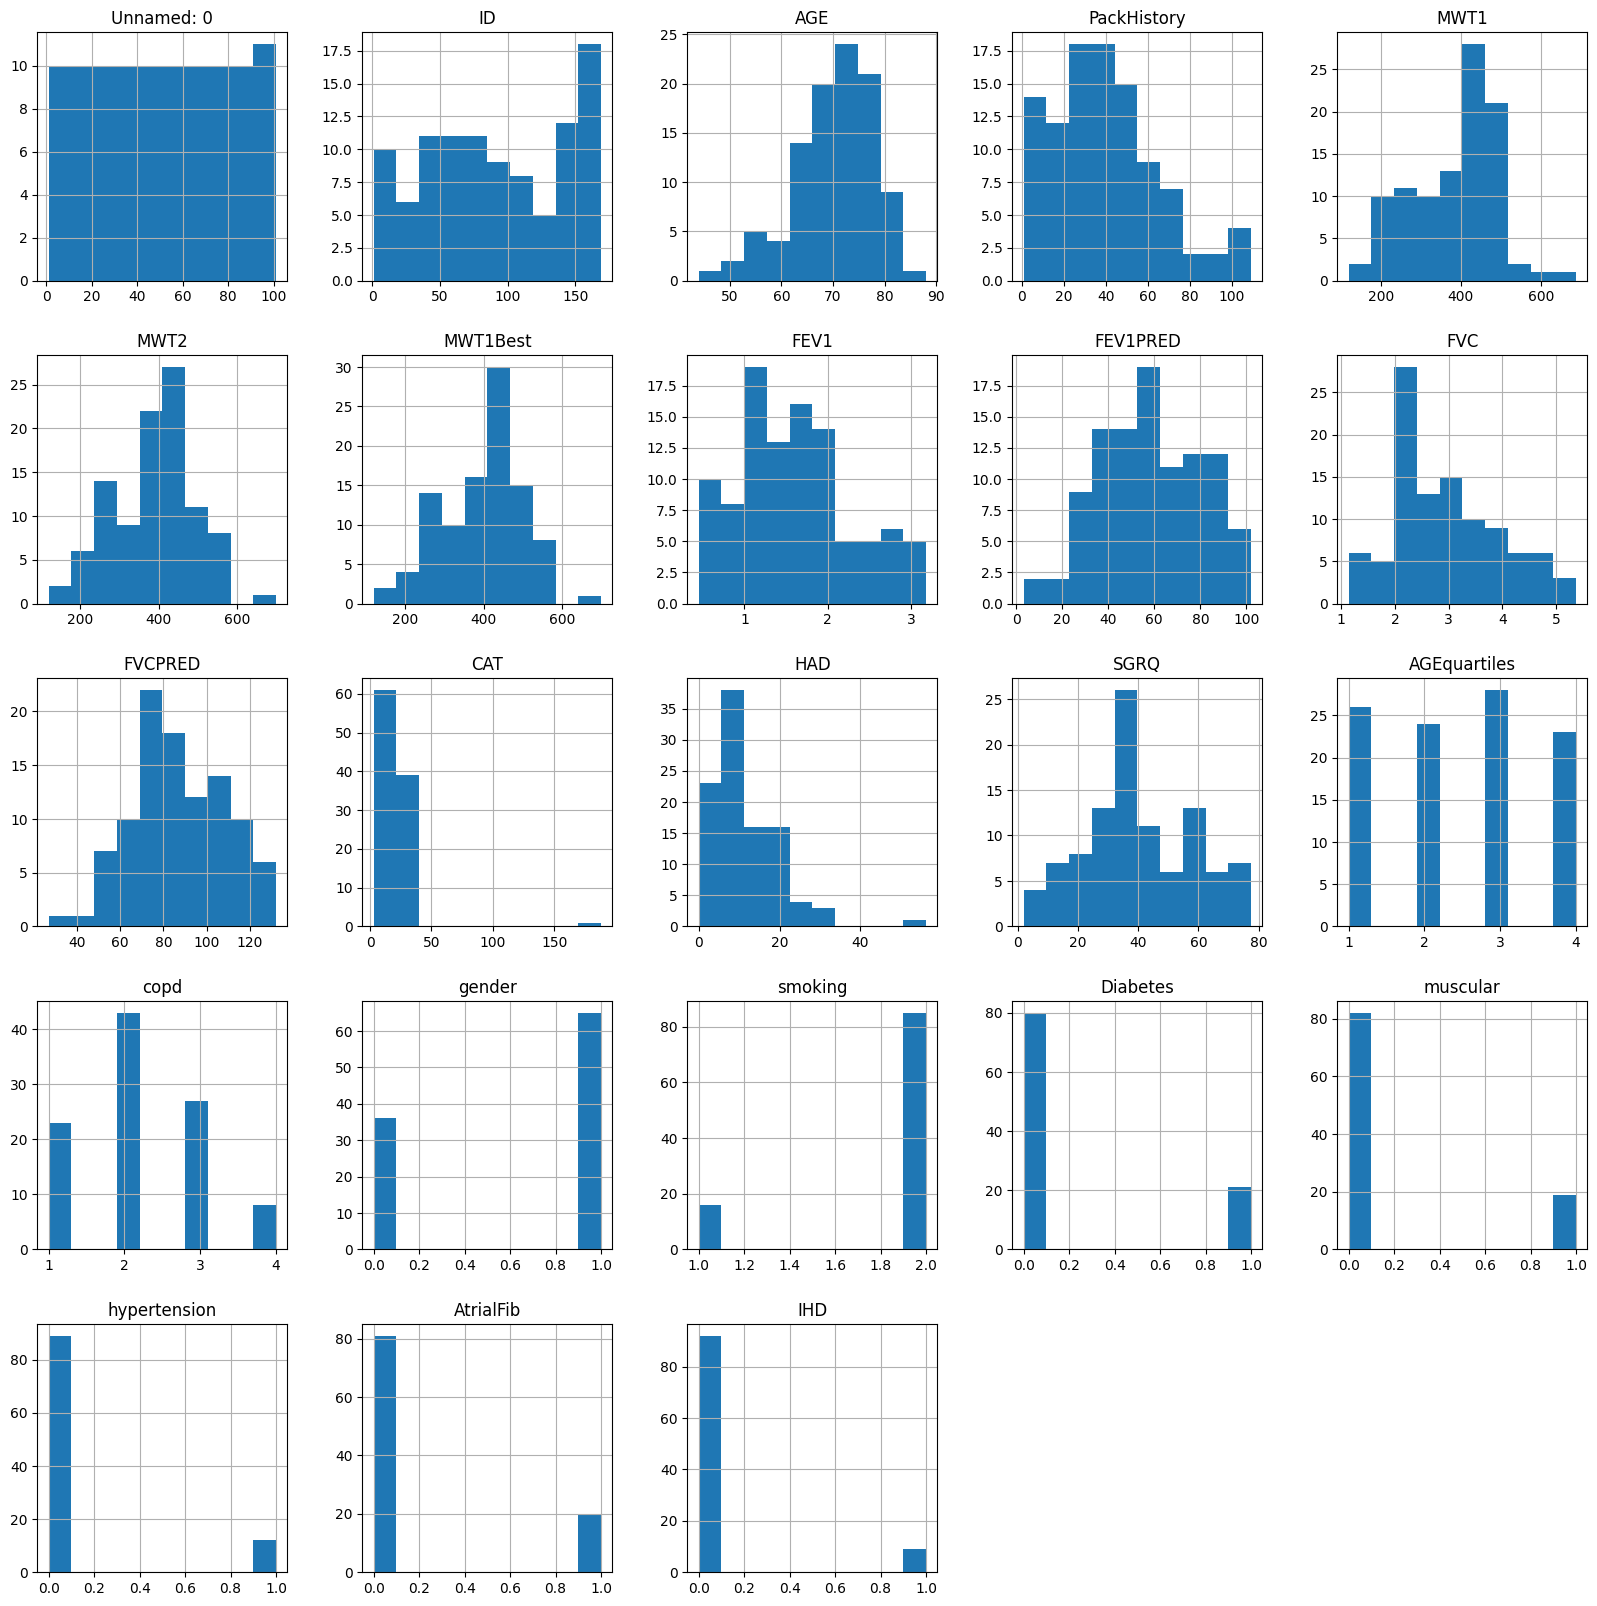

In [15]:
import matplotlib.pyplot as plt
data.hist(figsize=[20,20])
plt.show

In [16]:
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='AGE'>

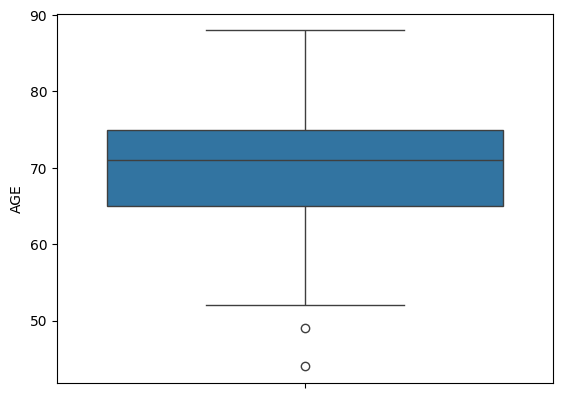

In [17]:
import seaborn as sns
sns.boxplot(data['AGE'])

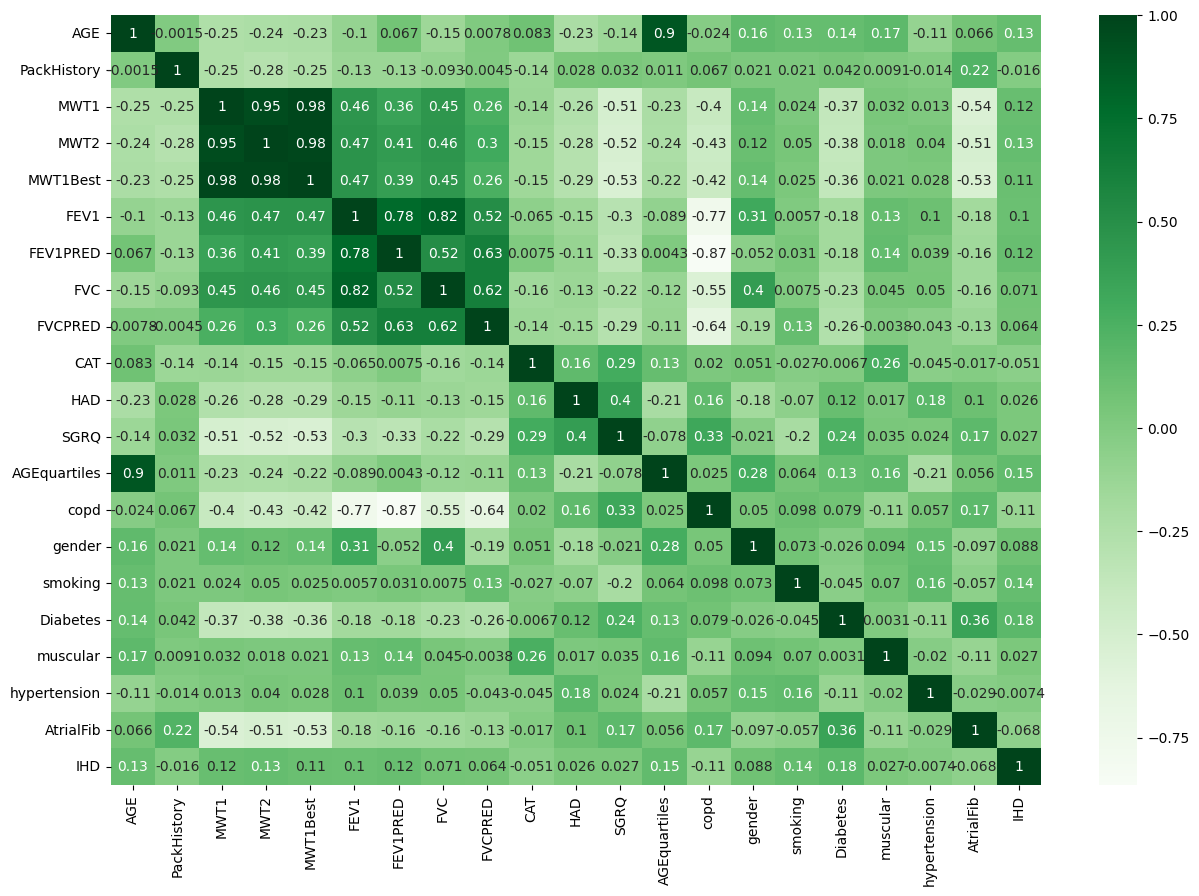

In [18]:
data_corr = data[['AGE', 'PackHistory', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD']]
matrix = data_corr.corr()
# Menentukan ukuran figur
plt.figure(figsize=(15, 10))  # Anda bisa mengubah angka sesuai kebutuhan
# Plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)
plt.show()

## **Menggunakan 6 Variabel**

In [19]:
data = data[["FEV1PRED","AGE", "MWT1Best", "SGRQ", "smoking", "copd"]]

In [20]:
data["copd"].value_counts()

copd
2    43
3    27
1    23
4     8
Name: count, dtype: int64

In [26]:
data.loc[data["copd"] == 4, "copd"] = 3

In [27]:
data["copd"].value_counts()

copd
2    42
3    35
1    23
Name: count, dtype: int64

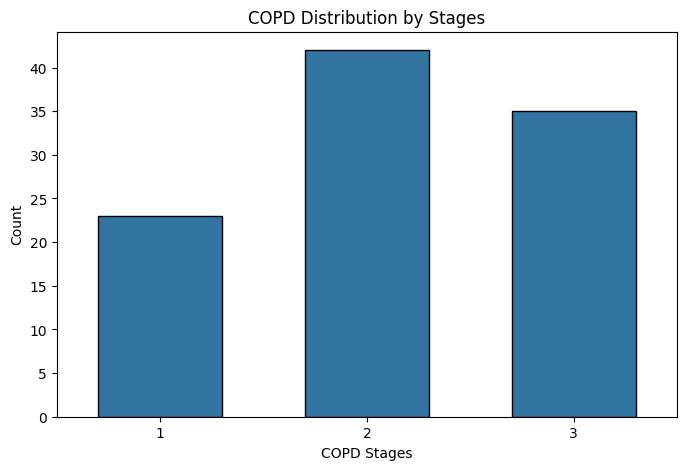

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x="copd", data=data, width=0.6, edgecolor="black")  
plt.xticks([0, 1, 2], labels=[1, 2, 3])       
plt.xlabel("COPD Stages")
plt.ylabel("Count")
plt.title("COPD Distribution by Stages")
plt.show()

## Random Forest

In [40]:
data = data.dropna()
X = data.drop(["copd"], axis = 1)
y = data["copd"]

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# handling imbalance data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# feature scaling
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        10

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



# XGBOOST

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# handling imbalance data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model
xg.fit(X_train, y_train)

# Make predictions
xg_preds = xg.predict(X_test)

# Print classification report
print(classification_report(y_test, xg_preds))


              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00        10

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
##RandomsearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 350, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 5, 10]  # Adjust for imbalance
}

# Initialize the model
xgb = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='recall_macro',  # Optimize for macro recall to handle all classes
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_train, y_train)

# Check best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best recall score from tuning: ", random_search.best_score_)

# Re-train the model with best parameters
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Make predictions
best_xgb_preds = best_xgb.predict(X_test)

# Print the classification report
print(classification_report(y_test, best_xgb_preds))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}
Best recall score from tuning:  0.9476190476190476
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00        10

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



In [ ]:
##Bayesian optimization
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the function to optimize
def xgb_cv(n_estimators, learning_rate, max_depth, min_child_weight, gamma, subsample, colsample_bytree):
    # Define the model with the current parameters
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )
    
    # Perform cross-validation and calculate recall (macro average) as the score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(recall_score, average='macro'))
    return cv_scores.mean()

# Define the parameter space for Bayesian Optimization
param_bounds = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.3),
    'max_depth': (3, 10),
    'min_child_weight': (1, 10),
    'gamma': (0, 0.5),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=xgb_cv,         # Function to optimize
    pbounds=param_bounds,  # Parameter bounds
    random_state=42,
    verbose=2
)

# Run the optimization
optimizer.maximize(init_points=10, n_iter=100)

# Extract the best parameters
best_params = optimizer.max['params']
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])

print("Best parameters found: ", best_params)

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions and evaluate
best_xgb_preds = best_xgb.predict(X_test)
print(classification_report(y_test, best_xgb_preds))


|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------


| 1         | 0.9286    | 0.7498    | 0.4754    | 0.2223    | 7.191     | 2.404     | 162.4     | 0.6232    |
| 2         | 0.9012    | 0.9465    | 0.3006    | 0.2153    | 3.144     | 9.729     | 433.0     | 0.6849    |
| 3         | 0.9119    | 0.6727    | 0.0917    | 0.09823   | 6.673     | 4.888     | 216.5     | 0.8447    |
| 4         | 0.9107    | 0.6558    | 0.1461    | 0.1162    | 6.192     | 8.067     | 179.9     | 0.8057    |
| 5         | 0.9298    | 0.837     | 0.02323   | 0.1862    | 4.194     | 1.585     | 479.6     | 0.9863    |
| 6         | 0.9286    | 0.9234    | 0.1523    | 0.03832   | 7.79      | 4.961     | 148.8     | 0.7981    |
| 7         | 0.9202    | 0.6138    | 0.4547    | 0.08505   | 7.638     | 3.805     | 308.0     | 0.8187    |
| 8         | 0.9095    | 0.6739    | 0.4848    | 0.2348    | 9.576     | 9.053     | 339.2     | 0.9687    |
| 9         | 0.9286    | 0.6354    | 0.09799   | 0.02312   | 5.277     | 4.498     | 208.5     | 0.9315    |
| 10      

# Confussion Matriks

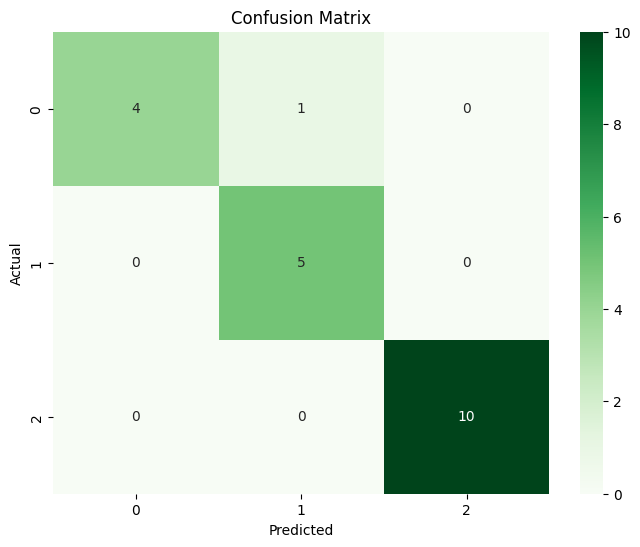

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, xg_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# Save model terbaik
import joblib
import h5py

# Fit the model dan menyimpan model terbaik
xg.fit(X_train, y_train, early_stopping_rounds=10, 
       eval_set=[(X_test, y_test)], 
       eval_metric='logloss', verbose=True)

# Mengekspor model XGBoost ke file .model terlebih dahulu
xg.save_model("best_model.model")

# Kemudian konversi ke format .h5
model_filename = "best_model.h5"
with h5py.File(model_filename, 'w') as f:
    joblib.dump(xg, f)

print(f"Model berhasil diekspor ke {model_filename}")


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoostError: [19:48:52] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\metric\elementwise_metric.cu:346: Check failed: preds.Size() == info.labels.Size() (120 vs. 30) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification